In [5]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

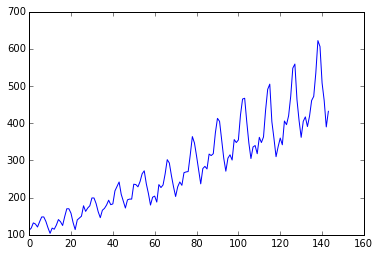

In [6]:
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [7]:
dataset

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


In [8]:
import numpy as np
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [9]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [10]:
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [11]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [12]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(96, 48)


In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [25]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [26]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [31]:
trainX[0]

array([[ 0.01544401,  0.02702703,  0.05405405]], dtype=float32)

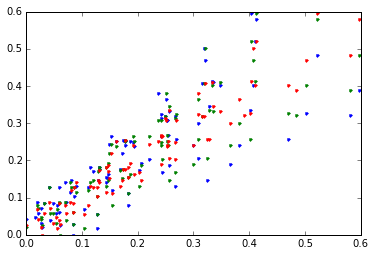

In [32]:
#plt.plot(trainX,testX)
trainxx = np.array(trainX)
plt.plot(trainxx[:,0],trainY,'.')

In [33]:
len(trainX[0,0])

3

In [34]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=24, batch_size=1, verbose=0)

In [35]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 27.28 RMSE
Test Score: 75.63 RMSE


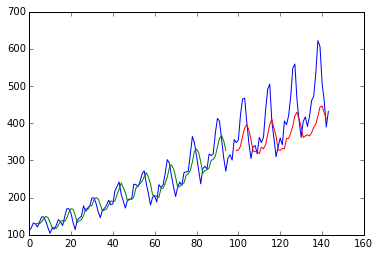

In [36]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
nb_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='linear'))

model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

# generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, nb_classes))

# generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, nb_classes))

model.fit(x_train, y_train,
          batch_size=64, nb_epoch=5,
          validation_data=(x_val, y_val))

Train on 1000 samples, validate on 100 samples
Epoch 1/5
1000/1000 [==============================] - 9s - loss: 0.1531 - acc: 0.1110 - val_loss: 0.0834 - val_acc: 0.1100
Epoch 2/5
1000/1000 [==============================] - 7s - loss: 0.0845 - acc: 0.1020 - val_loss: 0.0824 - val_acc: 0.1400
Epoch 3/5
1000/1000 [==============================] - 6s - loss: 0.0845 - acc: 0.1050 - val_loss: 0.0835 - val_acc: 0.1200
Epoch 4/5
1000/1000 [==============================] - 6s - loss: 0.0845 - acc: 0.1000 - val_loss: 0.0859 - val_acc: 0.1000
Epoch 5/5
1000/1000 [==============================] - 6s - loss: 0.0843 - acc: 0.0950 - val_loss: 0.0820 - val_acc: 0.1300


In [38]:
x_train[0]

array([[ 0.23260718,  0.86918483,  0.84079141,  0.18223105,  0.48418349,
         0.18249155,  0.247564  ,  0.27681825,  0.34058501,  0.94552613,
         0.3261526 ,  0.79921224,  0.2512571 ,  0.82983161,  0.54943414,
         0.08213979],
       [ 0.6775702 ,  0.66069364,  0.96655121,  0.35248327,  0.27955145,
         0.16020918,  0.7170223 ,  0.25502572,  0.61711633,  0.03427906,
         0.57811996,  0.33292227,  0.20474206,  0.68227823,  0.42645915,
         0.91191437],
       [ 0.19373284,  0.93489066,  0.24375268,  0.28362323,  0.87005987,
         0.50121295,  0.77137291,  0.90288043,  0.37929713,  0.20672546,
         0.89026851,  0.31459913,  0.11771617,  0.19946103,  0.33568645,
         0.1958226 ],
       [ 0.24070819,  0.93802775,  0.92093026,  0.79625583,  0.93804502,
         0.32995428,  0.27448339,  0.85540889,  0.87331934,  0.11237933,
         0.16924879,  0.77518012,  0.72658721,  0.08100204,  0.53487139,
         0.49379757],
       [ 0.03713259,  0.26463561,  0